# Домашнее задание 2

## Загрузка данных и первичный осмотр

In [130]:
import pandas as pd

In [131]:
import numpy as np

In [132]:
import matplotlib.pyplot as plt

In [133]:
data = pd.read_csv('S02-hw-dataset.csv', sep=',', encoding='cp1251')
data

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [15]:
data.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [16]:
data.head(3)

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [18]:
data.columns

Index(['user_id', 'age', 'country', 'purchases', 'revenue'], dtype='object')

In [19]:
data.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


## Пропуски, дубликаты и базовый контроль качества

### Доля пропусков

In [22]:
data['user_id'].isna().mean()

np.float64(0.0)

In [24]:
data['age'].isna().mean()

np.float64(0.04878048780487805)

In [26]:
data['age'].isna().sum()

np.int64(2)

In [50]:
data[data['age'].isna()]

,user_id,age,country,purchases,revenue
4,5,NaN,DE,6,1296
12,13,NaN,US,9,630


In [27]:
data['purchases'].isna().mean()

np.float64(0.0)

In [28]:
data['revenue'].isna().mean()

np.float64(0.0)

### Поиск дублирующихся строк

In [30]:
data.duplicated().sum()

np.int64(1)

In [51]:
data[data.duplicated()]

,user_id,age,country,purchases,revenue
40,10,24.0,RU,7,511


### Проверка некорректных значений

In [47]:
((data['age'] < 0) | (data['age'] > 100)).sum()

np.int64(1)

In [46]:
data[((data['age'] < 0) | (data['age'] > 100))]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [37]:
(data['purchases'] < 0).sum()

np.int64(1)

In [38]:
data[data['purchases'] < 0]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [44]:
((data['revenue'] == 0) & (data['purchases'] > 0)).sum()

np.int64(1)

In [45]:
data[(data['revenue'] == 0) & (data['purchases'] > 0)]

,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


In [48]:
(data['revenue'] < 0).sum()

np.int64(0)

### Кратккий вывод

В данном датасете было обнаружено 2 пропуска в колонке с возрастом('age') в строках 4 и 12 , одна дублирующая строка(40 строка дублирует 9), также в колонке с возрастом было обнаружено некорректное значение(в строке 5 возраст равен 120), в колонке с покупками('purchases') была найдена отрицательная покупка(строка 5), в строке 10 при 0 доходе было совершено 4 покупки, что тоже может вызывать подозрение.

## Базовый EDA: группировки, агрегаты и частоты

In [54]:
data['country'].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [60]:
data.groupby('country')['revenue'].mean() #средний доход по странам

country
CN    1054.000000
DE    1445.500000
FR     675.916667
RU     790.076923
US     557.375000
Name: revenue, dtype: float64

In [62]:
data.groupby('country')['age'].mean() #средний возраст по странам

country
CN    24.000000
DE    34.600000
FR    46.250000
RU    30.076923
US    36.714286
Name: age, dtype: float64

In [65]:
data.groupby('country')['purchases'].sum() #количество покупок по странам

country
CN     9
DE    39
FR    51
RU    62
US    37
Name: purchases, dtype: int64

In [69]:
data.groupby('country')['revenue'].min() #минимальный доход по странам

country
CN    456
DE    702
FR      0
RU      0
US      0
Name: revenue, dtype: int64

In [70]:
data.groupby('country')['revenue'].max() #максимальный доход по странам

country
CN    1652
DE    2475
FR    1608
RU    2086
US     980
Name: revenue, dtype: int64

In [134]:
#средний доход по странам и возрастным категориям
data_clean = data.dropna().copy()
data_clean['age_group'] = pd.cut(data['age'], bins=[0, 18, 35, 55, 65, 120],
                           labels=['Дети', 'Молодежь','Средний возраст', 'Пожилые', 'Старшее поколение'],
                          include_lowest=True)
data_clean.groupby(['country', 'age_group'], observed=False)['revenue'].mean()

country  age_group        
CN       Дети                         NaN
         Молодежь             1054.000000
         Средний возраст              NaN
         Пожилые                      NaN
         Старшее поколение            NaN
DE       Дети                 1104.000000
         Молодежь             1606.500000
         Средний возраст      1530.000000
         Пожилые                      NaN
         Старшее поколение            NaN
FR       Дети                         NaN
         Молодежь              617.200000
         Средний возраст       709.400000
         Пожилые               693.000000
         Старшее поколение     785.000000
RU       Дети                 1488.000000
         Молодежь              783.222222
         Средний возраст       578.000000
         Пожилые                      NaN
         Старшее поколение            NaN
US       Дети                         NaN
         Молодежь              258.333333
         Средний возраст       763.500000
       

### Краткий вывод

В данном наборе данных по количеству преобладают жители России и Франции(13 и 12), больше всего покупок совершили жители России(62), самый высокий доход в Германии(1445.500000), а самый низкий в США(557.375000), самый высокий средний возраст во Франции(46), а самый низкий в Китае(24).
В некоторых странах есть пользователи с нулевым доходом, что может указывать на то, что эти пользователи неактивны.
Есть неожиданный эффект: в Росии самый высокий доход у детей, что скорее всего требует дополнительной проверки на аномалии.

## Визуализация данных в Matplotlib

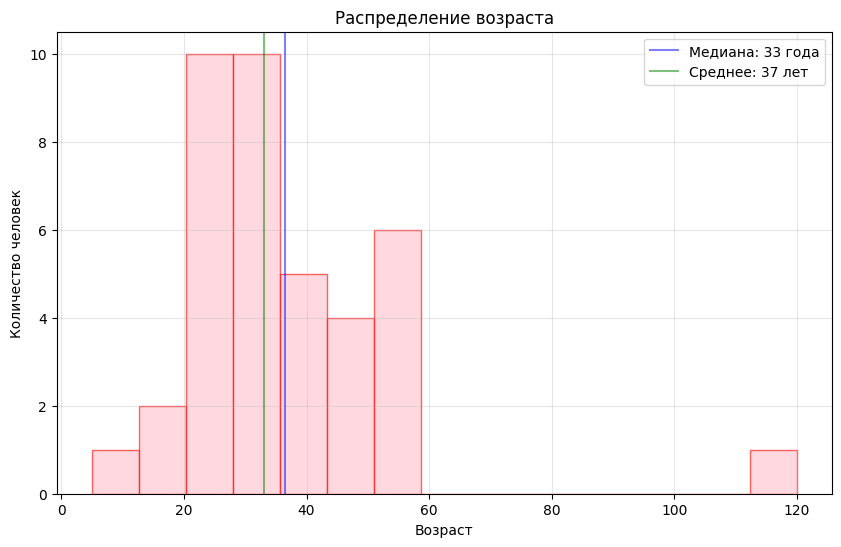

In [331]:
plt.figure(figsize=(10,6))
plt.hist(data_clean['age'], bins=15, color='pink',edgecolor='red', alpha=0.6)
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество человек')

mean_age = data['age'].mean()
median_age = data['age'].median()
plt.axvline(mean_age, color='blue', alpha=0.5, label=f'Медиана: {round(median_age)} года')
plt.axvline(median_age, color='green', alpha=0.5, label=f'Среднее: {round(mean_age)} лет')
plt.legend()
plt.grid(True, alpha=0.3)

plt.savefig('figures/age_distribution.png',facecolor='white', bbox_inches='tight')
plt.show()

На данном графике показано распределение возраста. В основном это люди до 60 лет, больше всего людей 20-40 лет. Также есть 1 значение, которое можно поставить под сомнение(возраст 120 лет).

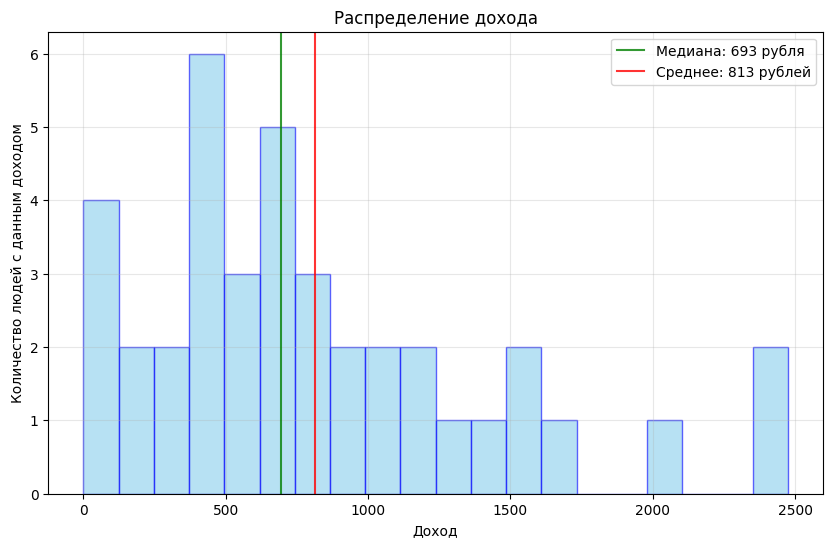

In [332]:
plt.figure(figsize=(10,6))
plt.hist(data_clean['revenue'], bins=20, color='skyblue', alpha=0.6, edgecolor='blue')
plt.grid(True, alpha=0.3)
plt.title('Распределение дохода')
plt.xlabel('Доход')
plt.ylabel('Количество людей с данным доходом')

revenue_median = data_clean['revenue'].median()
revenue_mean = data_clean['revenue'].mean()

plt.axvline(revenue_median, color='green', alpha=0.8, label=f'Медиана: {round(revenue_median)} рубля')
plt.axvline(revenue_mean, color='red', alpha=0.8, label=f'Среднее: {round(revenue_mean)} рублей')
plt.legend()


plt.savefig('figures/revenue_distribution.png', facecolor='white', bbox_inches='tight')
plt.show()

На данном гафике показано распределение дохода. Можно заметить, что медиана больше среднего, что означает, что есть небольшое количество человек с высоким доходом, которые перетягивают среднее в большую сорону. Большая часть доходов сосредоточена в левой половине графика.

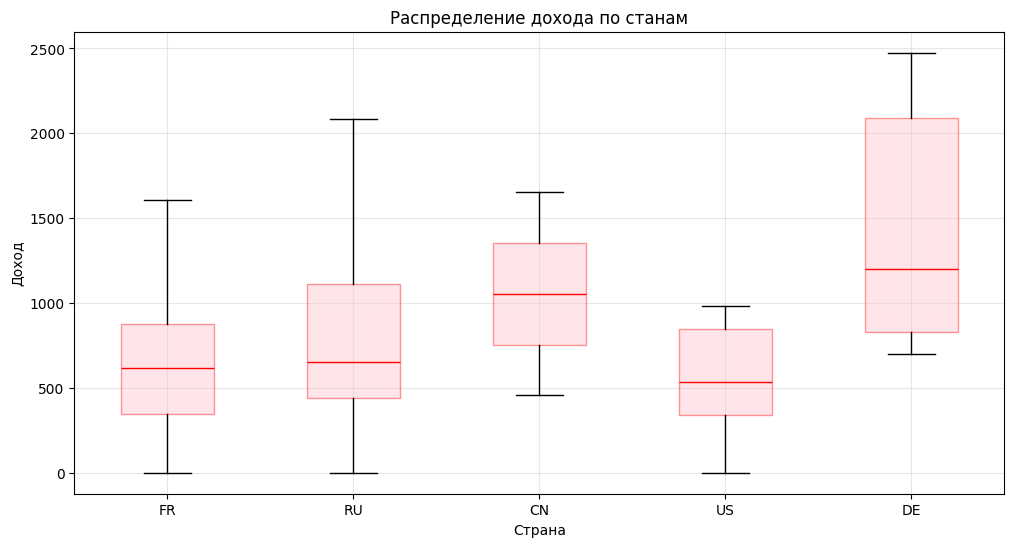

In [333]:
plt.figure(figsize=(12,6))

counries = data['country'].unique()
revenue_data = [data[data['country'] == country]['revenue'] for country in countries]

plt.boxplot(revenue_data, tick_labels=countries, patch_artist=True,
            boxprops={"facecolor": "pink", "alpha": 0.4, "edgecolor": "red"},
           medianprops={"color":"red"})
plt.title('Распределение дохода по станам')
plt.xlabel('Страна')
plt.ylabel('Доход')
plt.grid(alpha=0.3)


plt.savefig('figures/country_revenue.png', facecolor='white', bbox_inches='tight')
plt.show()

На данном гафике показано распределение доходов по странам. Самый высокий доход в Германии и Китае, а Самый низкий доход в США.

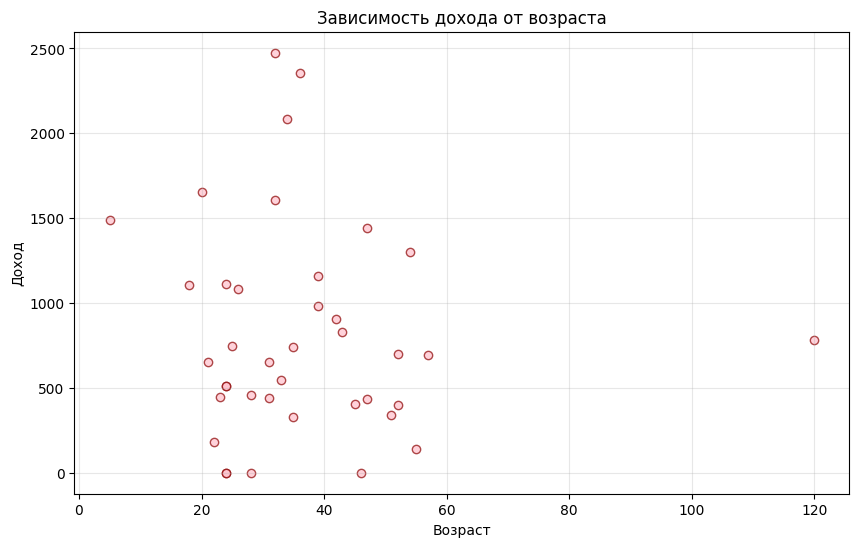

In [334]:
plt.figure(figsize=(10,6))

plt.scatter(data_clean['age'], data_clean['revenue'], color='pink', alpha=0.7, edgecolor='darkred')
plt.grid(True, alpha=0.3)
plt.title('Зависимость дохода от возраста')
plt.xlabel('Возраст')
plt.ylabel('Доход')

plt.savefig('figures/dependence_of_revenue_on_age.png',facecolor='white', bbox_inches='tight')
plt.show()


На данном графике показана зависимость дохода от возраста. Есть нулевые значения дохода, станные значения(выокий доход в совсем юном возрасте). На графике нет четкой линейной зависмости.